A. Simulating MA processes...

MA(1) process simulated and plotted
MA(2) process simulated and plotted
MA(3) process simulated and plotted

B. Simulating AR processes...
AR(1) process simulated and plotted
AR(2) process simulated and plotted
AR(3) process simulated and plotted

C. Analyzing the provided data...
ACF and PACF of the data plotted

D. Fitting different models...
AR(1) - AICc: -1669.07
AR(2) - AICc: -1696.05
AR(3) - AICc: -1746.22
MA(1) - AICc: -1508.90
MA(2) - AICc: -1559.21
MA(3) - AICc: -1645.07

Best model by AICc: AR(3) (AICc: -1746.22)


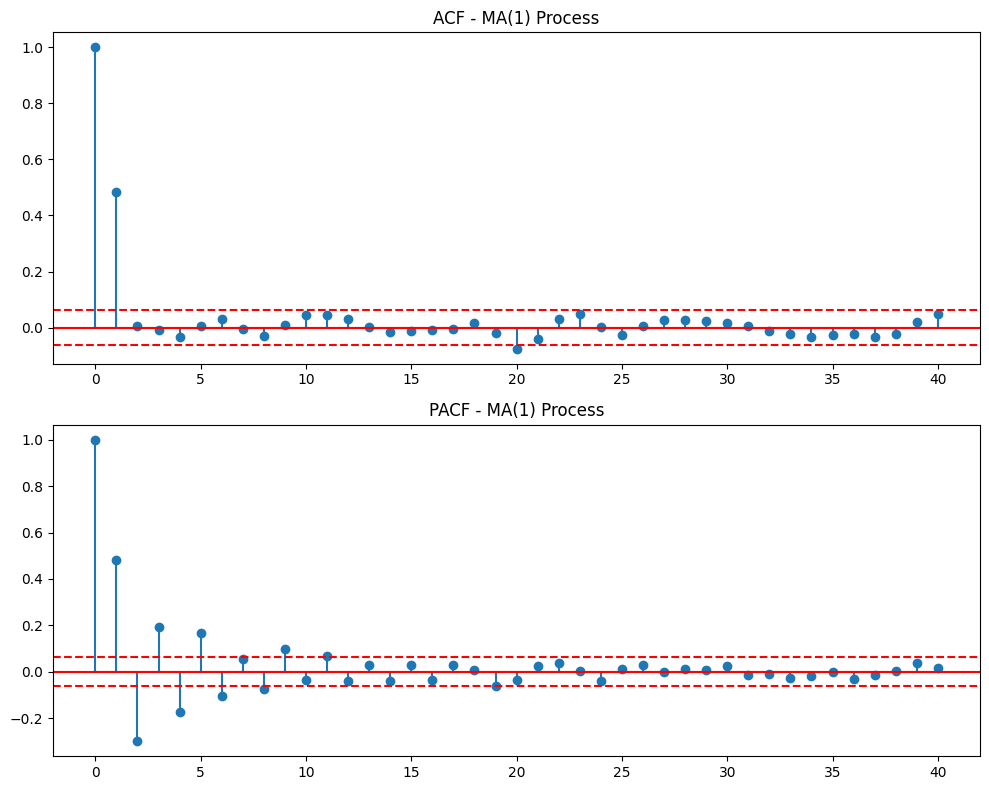

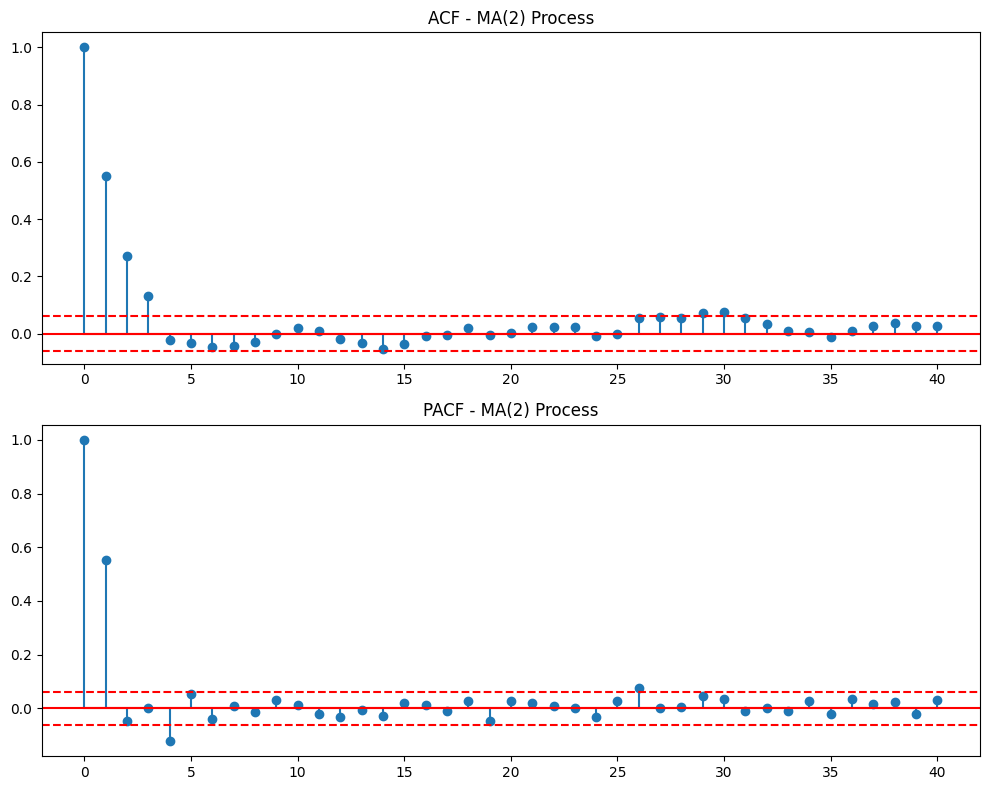

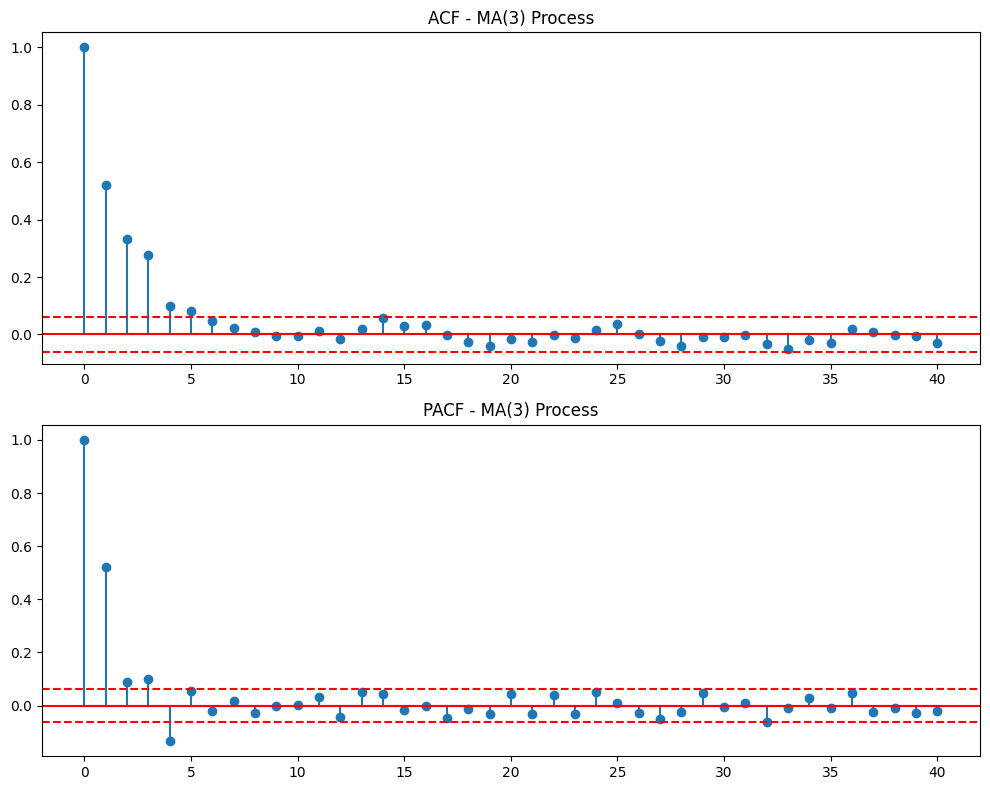

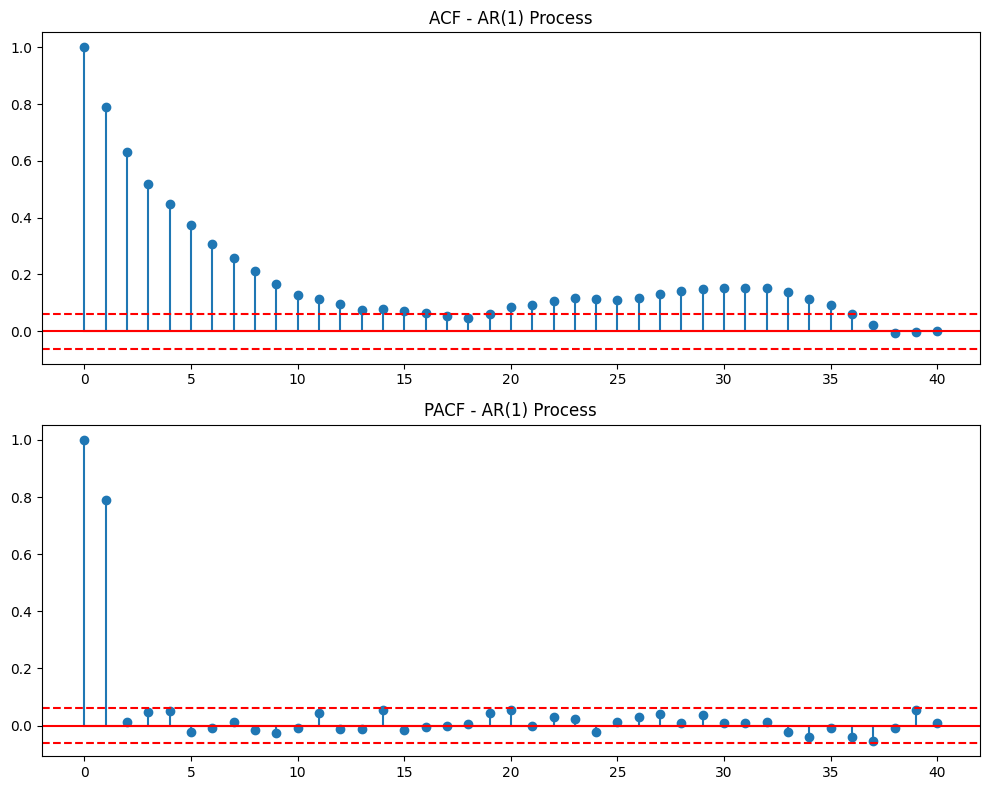

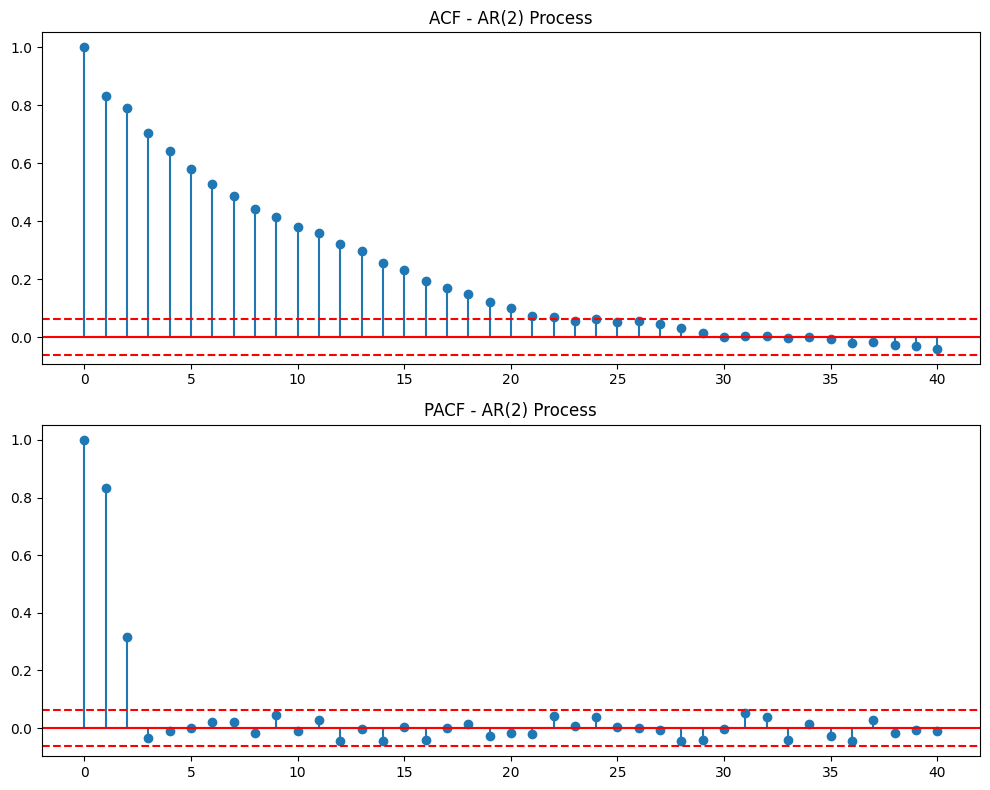

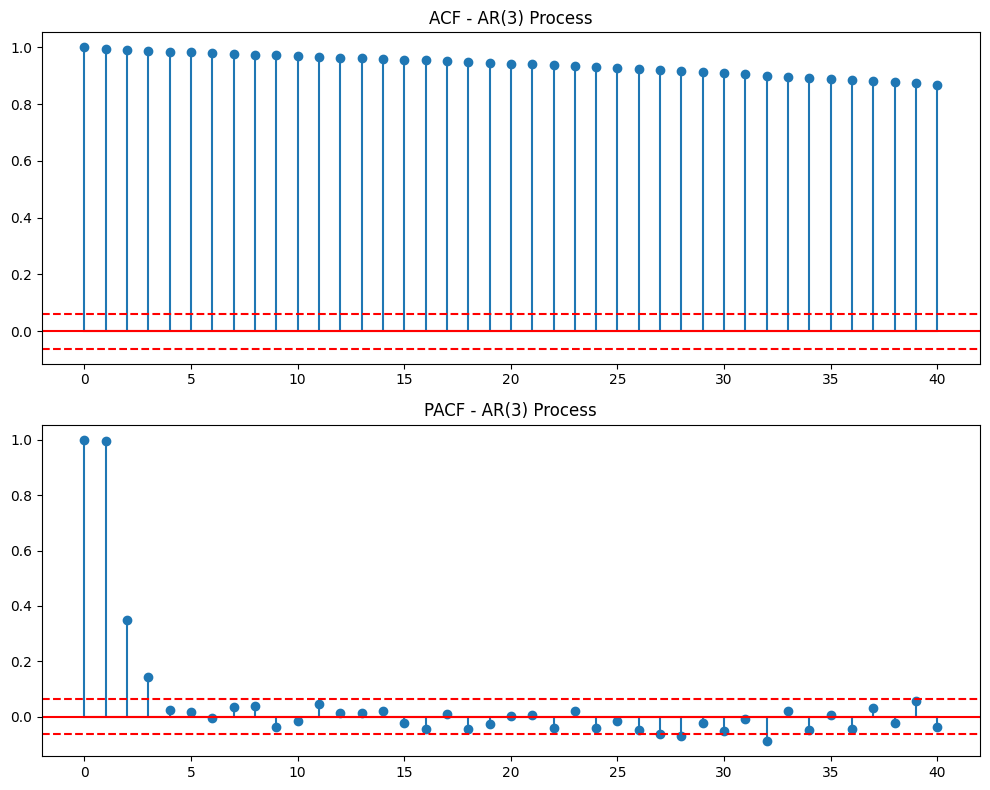

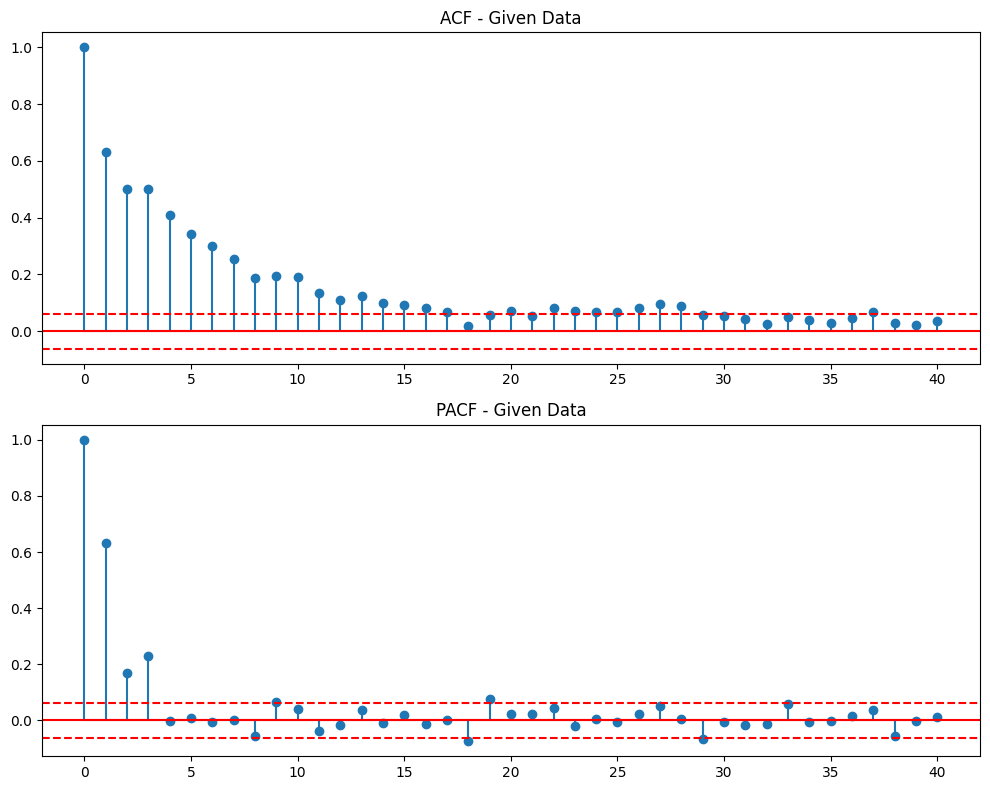

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from scipy import stats

def simulate_ma_process(n, theta, sigma=1.0):
    """
    Simulate MA(q) process
    n: length of series
    theta: MA coefficients
    sigma: standard deviation of white noise
    """
    q = len(theta)
    w = np.random.normal(0, sigma, n + q)
    y = w[q:]
    for i in range(q):
        y += theta[i] * w[q-1-i:-i-1]
    return y

def simulate_ar_process(n, phi, sigma=1.0):
    """
    Simulate AR(p) process
    n: length of series
    phi: AR coefficients
    sigma: standard deviation of white noise
    """
    p = len(phi)
    w = np.random.normal(0, sigma, n)
    y = np.zeros(n)
    
    # Initialize with random values
    y[:p] = np.random.normal(0, sigma, p)
    
    # Generate series
    for t in range(p, n):
        y[t] = np.sum([phi[i] * y[t-i-1] for i in range(p)]) + w[t]
    return y

def plot_acf_pacf(data, title, lags=40):
    """
    Plot ACF and PACF
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot ACF
    acf_values = acf(data, nlags=lags)
    ax1.stem(range(lags + 1), acf_values)
    ax1.set_title(f'ACF - {title}')
    ax1.axhline(y=0, color='r', linestyle='-')
    ax1.axhline(y=1.96/np.sqrt(len(data)), color='r', linestyle='--')
    ax1.axhline(y=-1.96/np.sqrt(len(data)), color='r', linestyle='--')
    
    # Plot PACF
    pacf_values = pacf(data, nlags=lags)
    ax2.stem(range(lags + 1), pacf_values)
    ax2.set_title(f'PACF - {title}')
    ax2.axhline(y=0, color='r', linestyle='-')
    ax2.axhline(y=1.96/np.sqrt(len(data)), color='r', linestyle='--')
    ax2.axhline(y=-1.96/np.sqrt(len(data)), color='r', linestyle='--')
    
    plt.tight_layout()
    return fig

def calculate_aicc(model):
    """
    Calculate AICc (Akaike Information Criterion with correction for small sample sizes)
    """
    aic = model.aic
    n = len(model.data.orig_endog)
    k = len(model.params)
    aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
    return aicc

def analyze_time_series(file_path='problem4.csv'):
    """
    Main analysis function
    """
    # Read the data
    df = pd.read_csv(file_path)
    data = df['y'].values
    n = len(data)
    
    # A. Simulate and plot MA processes
    print("A. Simulating MA processes...")
    np.random.seed(42)  # For reproducibility
    
    # MA(1)
    ma1 = simulate_ma_process(n, [0.8])
    fig1 = plot_acf_pacf(ma1, 'MA(1) Process')
    print("\nMA(1) process simulated and plotted")
    
    # MA(2)
    ma2 = simulate_ma_process(n, [0.6, 0.3])
    fig2 = plot_acf_pacf(ma2, 'MA(2) Process')
    print("MA(2) process simulated and plotted")
    
    # MA(3)
    ma3 = simulate_ma_process(n, [0.5, 0.3, 0.2])
    fig3 = plot_acf_pacf(ma3, 'MA(3) Process')
    print("MA(3) process simulated and plotted")
    
    # B. Simulate and plot AR processes
    print("\nB. Simulating AR processes...")
    
    # AR(1)
    ar1 = simulate_ar_process(n, [0.8])
    fig4 = plot_acf_pacf(ar1, 'AR(1) Process')
    print("AR(1) process simulated and plotted")
    
    # AR(2)
    ar2 = simulate_ar_process(n, [0.6, 0.3])
    fig5 = plot_acf_pacf(ar2, 'AR(2) Process')
    print("AR(2) process simulated and plotted")
    
    # AR(3)
    ar3 = simulate_ar_process(n, [0.5, 0.3, 0.2])
    fig6 = plot_acf_pacf(ar3, 'AR(3) Process')
    print("AR(3) process simulated and plotted")
    
    # C. Analyze the actual data
    print("\nC. Analyzing the provided data...")
    fig7 = plot_acf_pacf(data, 'Given Data')
    print("ACF and PACF of the data plotted")
    
    # D. Fit different models and compare AICc
    print("\nD. Fitting different models...")
    models = {
        'AR(1)': ARIMA(data, order=(1,0,0)),
        'AR(2)': ARIMA(data, order=(2,0,0)),
        'AR(3)': ARIMA(data, order=(3,0,0)),
        'MA(1)': ARIMA(data, order=(0,0,1)),
        'MA(2)': ARIMA(data, order=(0,0,2)),
        'MA(3)': ARIMA(data, order=(0,0,3))
    }
    
    results = {}
    for name, model in models.items():
        try:
            fit = model.fit()
            aicc = calculate_aicc(fit)
            results[name] = {
                'AICc': aicc,
                'model': fit
            }
            print(f"{name} - AICc: {aicc:.2f}")
        except:
            print(f"Warning: Could not fit {name} model")
    
    # Find best model
    best_model = min(results.items(), key=lambda x: x[1]['AICc'])
    print(f"\nBest model by AICc: {best_model[0]} (AICc: {best_model[1]['AICc']:.2f})")
    
    return {
        'data': data,
        'results': results,
        'best_model': best_model[0],
        'figures': [fig1, fig2, fig3, fig4, fig5, fig6, fig7]
    }

if __name__ == "__main__":
    results = analyze_time_series()